In [ ]:
# Import libraries 

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix




In [ ]:
 # import train file
  
#import test file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving train.csv to train (3).csv
User uploaded file "train.csv" with length 1959156 bytes


In [ ]:
# dataframe csv

df=pd.read_csv('train.csv')

df['topicMO']=''   # add new column to perform analysis

In [ ]:
#import test file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test (4).csv
User uploaded file "test.csv" with length 811068 bytes


In [ ]:
dft=pd.read_csv('test.csv')     # load test data

dffinal=dft[['Review Text','Review Title']]

In [ ]:
df.describe()    # dataframe info

  

,Review Text,Review Title,topic,topicMO
count,5959,5959,5959,5959
unique,4196,3727,21,1
top,"Be careful, it contains coumarin, and can dama...",Gross,Bad Taste/Flavor,
freq,6,19,1194,5959


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 4 columns):
Review Text     5959 non-null object
Review Title    5959 non-null object
topic           5959 non-null object
topicMO         5959 non-null object
dtypes: object(4)
memory usage: 186.3+ KB


In [ ]:
df.isnull().sum(axis = 0)     # check null value present in columns

Review Text     0
Review Title    0
topic           0
topicMO         0
dtype: int64

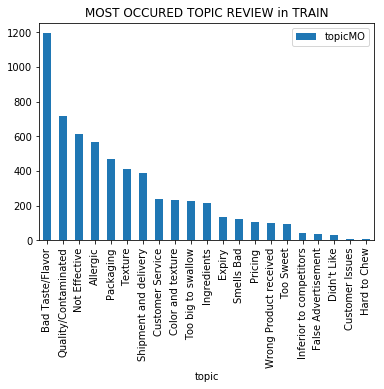

In [ ]:
df1=df[['topic','topicMO']].groupby(['topic']).count()
df1=df1.sort_values(['topicMO'],ascending=False)
df1.plot(kind='bar', title='MOST OCCURED TOPIC REVIEW in TRAIN')

In [ ]:
                                                  # convert all string to lower
df['Review Text']=df['Review Text'].str.lower()    


dft['Review Text']=dft['Review Text'].str.lower()


In [ ]:
                                                      # Reove symbol
def identify_tokens(row):
    review = row['Review Text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['Review Text'] = df.apply(identify_tokens, axis=1)

dft['Review Text'] = dft.apply(identify_tokens, axis=1)

In [ ]:
                                          # Perform stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def stem(row):
    my_list = row['Review Text']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return stemmed_list

df['Review Text'] = df.apply(stem, axis=1)

dft['Review Text'] = dft.apply(stem, axis=1)


In [ ]:
from nltk.stem import WordNetLemmatizer      # perform lemmatization
  
lemmatizer = WordNetLemmatizer() 

def lamm(row):
  my_list=row['Review Text']
  lamm=[lemmatizer.lemmatize(word)  for word in my_list]
  return  lamm
  
df['Review Text'] = df.apply(lamm, axis=1)

dft['Review Text'] = dft.apply(lamm, axis=1)  

df['Review Text'][0:5]

0    [did, noth, for, me, did, help, lost, even, wi...
1    [did, noth, for, me, did, help, lost, even, wi...
2    [i, have, bought, these, bag, and, immedi, ope...
3       [gave, me, an, allerg, reaction, on, my, face]
4    [these, do, compar, to, the, name, brand, wipe...
Name: Review Text, dtype: object

In [ ]:
from nltk.corpus import stopwords              # remove stops words
stops = stopwords.words("english")
'''
def remove_stops(row):
    my_list = row['Review Text']
    my_list=list(my_list)
    meaningful_words = [w for w in my_list if not w in stops]
    return meaningful_words

df['Review Text'] = df['Review Text'].apply(remove_stops)

dft['Review Text'] = dft['Review Text'].apply(remove_stops)

df['Review Text'][0:5]

'''

df['Review text']=df['Review Text'].apply(lambda x: [item for item in x if item not in stop])

dft['Review text']=dft['Review Text'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
def rejoin_words(row):
    my_list = row['Review Text']
    joined_words = ( " ".join(my_list))
    return joined_words

df['Review Text'] = df.apply(rejoin_words, axis=1)
dft['Review Text'] = dft.apply(rejoin_words, axis=1)

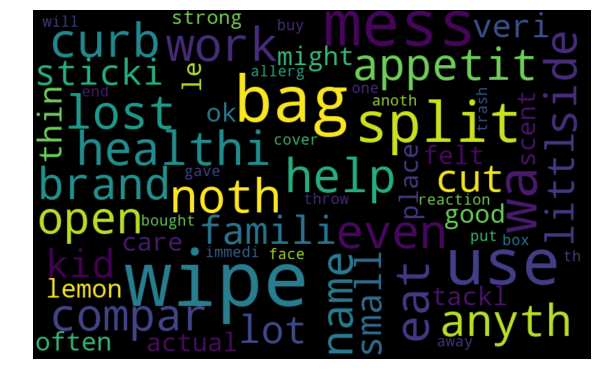

In [ ]:
# Understanding the common words used

all_words = ' '.join([text for text in df['Review Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words[:1000])

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

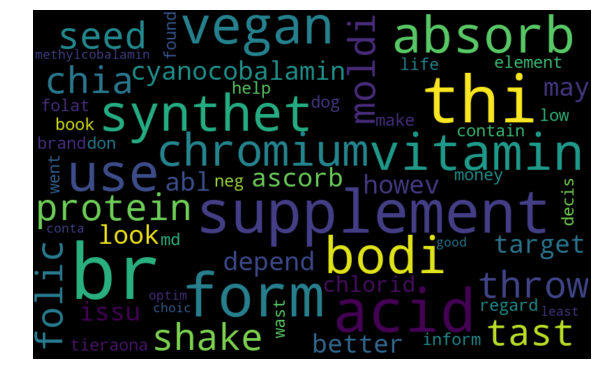

In [ ]:
# Understanding the common words used


all_words1 = ' '.join([text for text in dft['Review Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words1[:1000])

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df['Review Text'].head()

0    did noth for me did help lost even with work o...
1    did noth for me did help lost even with work o...
2    i have bought these bag and immedi open one pu...
3                gave me an allerg reaction on my face
4    these do compar to the name brand wipe famili ...
Name: Review Text, dtype: object

In [ ]:
# add topic column in test dataframe

dft['topic']=''

In [ ]:
train_nar = df['Review Text'][:]
train_pro = df['topic'][:]

test_nar = dft['Review Text'][:]
test_pro = dft['topic'][:]
test_nar[0:5]

0    i use chia seed in my protein shake these tast...
1    i use chia seed in my protein shake these tast...
2                                don t wast your money
3    i use the book your life by tieraona low dog m...
4    i use the book your life by tieraona low dog m...
Name: Review Text, dtype: object

In [ ]:
max_words = 500
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [ ]:
tokenize.fit_on_texts(train_nar) # only fit on train
x_train = tokenize.texts_to_matrix(train_nar)
x_test = tokenize.texts_to_matrix(test_nar)



In [ ]:

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_pro)
y_train = encoder.transform(train_pro)
#y_test = encoder.transform(test_product)


In [ ]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
#y_test = utils.to_categorical(y_test, num_classes)

In [ ]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape=', x_train.shape)
print('x_test shape=', x_test.shape)
print('y_train shape=', y_train.shape)


x_train shape= (5959, 500)
x_test shape= (2553, 500)
y_train shape= (5959, 21)


In [ ]:

batch_size = 68
epochs = 10

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 5363 samples, validate on 596 samples
Epoch 1/10
5363/5363 [==============================] - 3s 493us/step - loss: 2.4571 - acc: 0.3121 - val_loss: 2.0612 - val_acc: 0.4480
Epoch 2/10
5363/5363 [==============================] - 1s 106us/step - loss: 1.8219 - acc: 0.4882 - val_loss: 1.6985 - val_acc: 0.5101
Epoch 3/10
5363/5363 [==============================] - 1s 108us/step - loss: 1.5329 - acc: 0.5411 - val_loss: 1.5625 - val_acc: 0.5336
Epoch 4/10
5363/5363 [==============================] - 1s 108us/step - loss: 1.3649 - acc: 0.5711 - val_loss: 1.4884 - val_acc: 0.5403
Epoch 5/10
5363/5363 [==============================] - 1s 106us/step - loss: 1.2484 - acc: 0.5950 - val_loss: 1.4696 - val_acc: 0.5319
Epoch 6/10
5363/5363 [==============================] - 1s 105us/step - loss: 1.1829 - acc: 0.6045 - val_loss: 1.4800 - val_acc: 0.5436
Epoch 7/10
5363/5363 [==============================] - 1s 105us/step - loss: 1.1203 - acc: 0.6150 - val_loss: 1.4638 - val_acc: 0.5537
E

In [ ]:
# predict

predicted = model.predict(x_test)
predicted

array([[1.31656229e-02, 7.72834897e-01, 8.70134681e-03, ...,
        3.75030609e-03, 7.15745520e-03, 3.91822687e-04],
       [1.31656229e-02, 7.72834897e-01, 8.70134681e-03, ...,
        3.75030609e-03, 7.15745520e-03, 3.91822687e-04],
       [3.05994824e-02, 9.11002383e-02, 1.00424401e-02, ...,
        6.02239370e-03, 1.77683290e-02, 2.06638011e-03],
       ...,
       [2.45328218e-01, 5.62496603e-01, 2.72944029e-02, ...,
        2.11321795e-03, 5.40342601e-03, 2.09069462e-04],
       [1.45583395e-02, 2.70150751e-02, 1.22949854e-03, ...,
        7.96009495e-04, 7.99508824e-04, 8.52064695e-04],
       [6.63049472e-03, 3.05696316e-02, 1.31326879e-03, ...,
        1.85395486e-03, 1.59559562e-03, 1.64582615e-03]], dtype=float32)

In [ ]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

output_topic=[]
count_row = dft.shape[0]

for i in range(count_row):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    #print(test_narrative.iloc[i][:50], "...")
    #print('Actual label:' + test_product.iloc[i])
    #print("Predicted label: " + predicted_label + "\n")
    
    output_topic.append(predicted_label)

In [ ]:
my_submission = pd.DataFrame({'Review Text': dffinal['Review Text'],'Review Title':dffinal['Review Title'], 'topic': output_topic})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

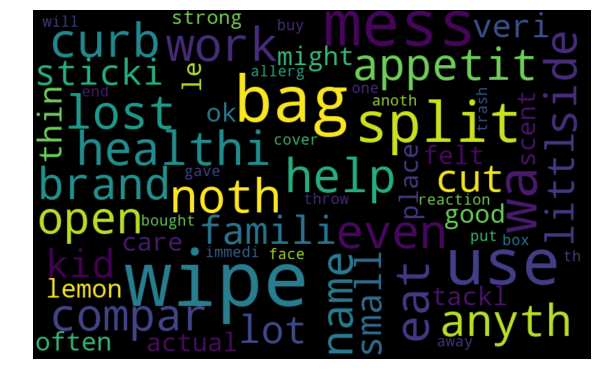